In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

In [2]:
def linear_regression_PI(X, y):
    """
    Implements a Linear Regression model using the Moore-Penrose pseudo-inverse
    
    Parameters
    ----------
    X : array
        A 2-dimensional array with samples in the rows and features in the columns
    y : array
        An array with the same number of  as samples in X, the values to predict
    
    Returns
    -------
    w : array
        Learnt parameters
        
    Notes
    -----
    The first column of w corresponds to the bias (`w_0`)
    """
    # Let's calculate X pseudo-inverse
    X_pi = np.linalg.inv(X.T @ X) @ X.T
    # Then calculate w tha is X pseudo-inverse times y
    w = X_pi @ y

    return w

def my_rmse(y_true:np.ndarray, y_pred:np.ndarray) -> float:
    diff_y = (y_true - y_pred) ** 2
    rmse = np.sqrt(np.mean(diff_y))
    return rmse

# Linear Regression

In this lab, we are going to continue to explore linear regression and introduce the concept of regularisation, specifically, Ridge Regression, Lasso and Elastic Net.

This lab starts with Part III of the previous one!



## Part 3 - Polynomial basis function

* Generate a 2D dataset using a sine wave (10 values for `x` in the interval $[0, 10]$), perturbed by a small gaussian noise. *Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0
* The Polynomial basis function that you will use is of the following form:
    - $\phi_i(x)=x^i$
* You will do this to create models of degrees 2, 4, and 9.
    - Transform your original `x` into the design matrix $\Phi$ by applying the basis functions to each element of `x`
    - For degree 2: $i\in[0,1,2]$, for degree 4: $i\in[0,1,2,3,4]$, and for degree 9: $i\in[0,1,2,...,9]$
    - *This means that for each Degree you will create a different $\Phi$ and fit a different regression model.*

* Plot the data and the prediction for each degree.
* Which degree of polynomial works better to model this scenario? 

Example: Let's say that $$x=\begin{bmatrix} x_1=2 \\ x_2=3 \\ x_3=1 \end{bmatrix}$$
Then for Degree 2 I will use the following basis functions: $\phi_0(x_j)=x_j^0, \phi_1(x_j)=x_j^1, \phi_2(x_j)=x_j^2$.

In this case, $\Phi$ will look like: 
$$\Phi=\begin{bmatrix} \phi_0(x_1)=x_1^0 & \phi_1(x_1)=x_1^1 & \phi_2(x_1)=x_1^2 \\ \phi_0(x_2)=x_2^0 & \phi_1(x_2)=x_2^1 & \phi_2(x_2)=x_2^2 \\ \phi_0(x_3)=x_3^0 & \phi_1(x_3)=x_3^1 & \phi_2(x_3)=x_3^2 \end{bmatrix}$$

Finally:
$$\Phi=\begin{bmatrix} 1 & 2 & 4 \\ 1 & 3 & 9 \\ 1 & 1 & 1 \end{bmatrix}$$

__*Important:* You have to code this exercise yourself.__



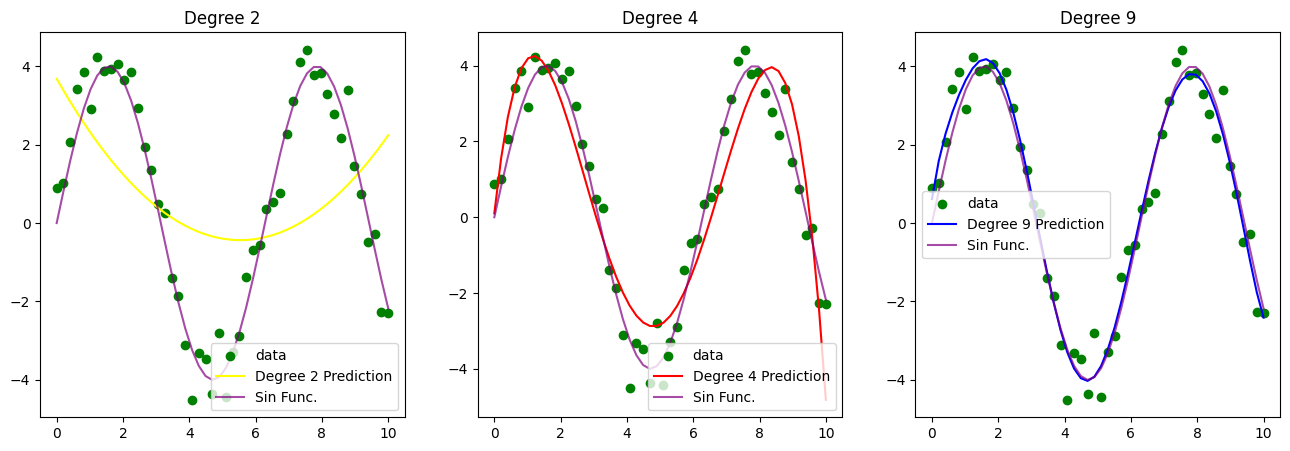

In [3]:
# your code here
np.random.seed(0)
# lets prepare our data
sample_size = 50
x = np.linspace(0, 10, sample_size)
noise = np.random.normal(loc=0, scale=0.5, size=sample_size)

y = 4*np.sin(x) + noise

# Then create de function to polynomial matrix
def make_polinomial_phi(data:np.ndarray, polinomial_base:int):
    phi_matrix = np.ones((data.shape[0], polinomial_base+1))

    for i in range(1, polinomial_base +1):
        phi_matrix[:,i] = np.power(data, i)

    return phi_matrix

# Creating our data
X_2 = make_polinomial_phi(x, 2)
X_4 = make_polinomial_phi(x, 4)
X_9 = make_polinomial_phi(x, 9)
# Making our models
w_2_pi = linear_regression_PI(X_2, y)
w_4_pi = linear_regression_PI(X_4, y)
w_9_pi = linear_regression_PI(X_9, y)
# Making the predictions
y_pred_pi_2 = X_2 @ w_2_pi
y_pred_pi_4 = X_4 @ w_4_pi
y_pred_pi_9 = X_9 @ w_9_pi


# Finally plotting the data
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 5))

ax1.set_title("Degree 2")
ax1.scatter(x=x, y=y, color="green", label="data")
ax1.plot(x, y_pred_pi_2, color="yellow", label="Degree 2 Prediction")
ax1.plot(x, 4*np.sin(x), color="purple", alpha=0.7, label="Sin Func.")
ax1.legend()

ax2.set_title("Degree 4")
ax2.scatter(x=x, y=y, color="green", label="data")
ax2.plot(x, y_pred_pi_4, color="red", label="Degree 4 Prediction")
ax2.plot(x, 4*np.sin(x), color="purple", alpha=0.7, label="Sin Func.")
ax2.legend()

ax3.set_title("Degree 9")
ax3.scatter(x=x, y=y, color="green", label="data")
ax3.plot(x, y_pred_pi_9, color="blue", label="Degree 9 Prediction")
ax3.plot(x, 4*np.sin(x), color="purple", alpha=0.7, label="Sin Func.")
ax3.legend()


plt.show()

The better degree for this scenario based on the plots is Degree 9.

## Part 4 - Polynomial basis function

For this part you will replicate the previous part but using the existing functions from sklearn!

* Use the same data as the previous part.
* Use sklearn's Linear Regression estimator together with a Polynomial transform to make a Linear regression with a polynomial basis.

*Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0

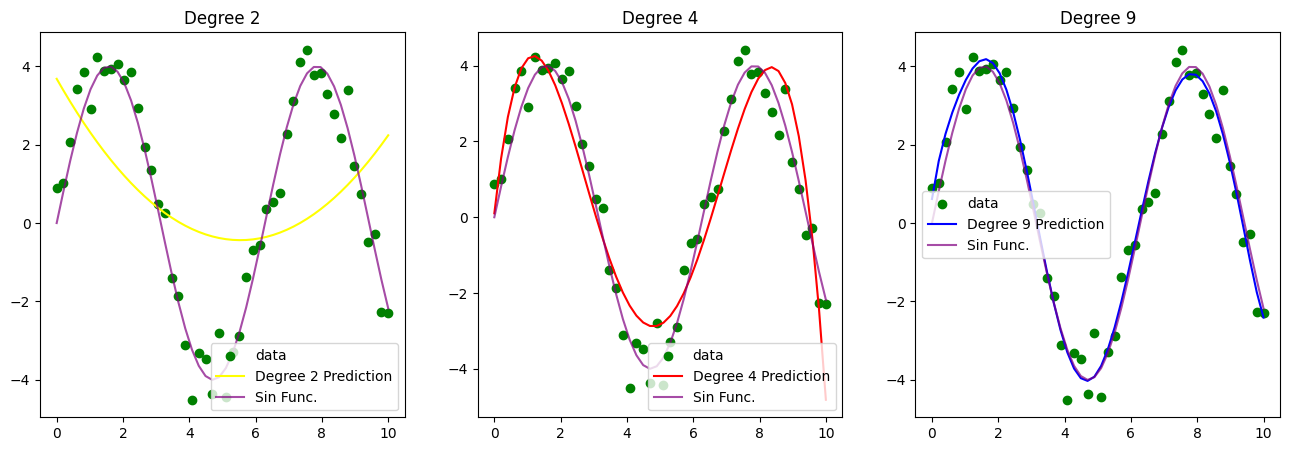

In [4]:
# your code here
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Lets reshape our data to sklearn valid format
x_vec = x.reshape(-1, 1)
y_vec = y.reshape(-1, 1)
# Them create the polynomial matrix
degree_2 = PolynomialFeatures(2)
X_deg_2 = degree_2.fit_transform(x_vec)
degree_4 = PolynomialFeatures(4)
X_deg_4 = degree_4.fit_transform(x_vec)
degree_9 = PolynomialFeatures(9)
X_deg_9 = degree_9.fit_transform(x_vec)
# And then fitting our model
w_deg_2 = LinearRegression().fit(X_deg_2, y_vec)
w_deg_4 = LinearRegression().fit(X_deg_4, y_vec)
w_deg_9 = LinearRegression().fit(X_deg_9, y_vec)
# Getting our predictions
y_pred_deg_2 = w_deg_2.predict(X_deg_2)
y_pred_deg_4 = w_deg_4.predict(X_deg_4)
y_pred_deg_9 = w_deg_9.predict(X_deg_9)

# Making the plots again
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 5))

ax1.set_title("Degree 2")
ax1.scatter(x=x, y=y, color="green", label="data")
ax1.plot(x, y_pred_deg_2, color="yellow", label="Degree 2 Prediction")
ax1.plot(x, 4*np.sin(x), color="purple", alpha=0.7, label="Sin Func.")
ax1.legend()

ax2.set_title("Degree 4")
ax2.scatter(x=x, y=y, color="green", label="data")
ax2.plot(x, y_pred_deg_4, color="red", label="Degree 4 Prediction")
ax2.plot(x, 4*np.sin(x), color="purple", alpha=0.7, label="Sin Func.")
ax2.legend()

ax3.set_title("Degree 9")
ax3.scatter(x=x, y=y, color="green", label="data")
ax3.plot(x, y_pred_deg_9, color="blue", label="Degree 9 Prediction")
ax3.plot(x, 4*np.sin(x), color="purple", alpha=0.7, label="Sin Func.")
ax3.legend()

plt.show()

### Load the housing dataset

Using pandas, load the following dataset (available in eclass, taken from http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html):

**housing.csv:** this dataset is constituted by 506 points in 14 dimensions. Each point represents a house in the Boston area, and the 14 attributes that you find orderly in each column are the following:
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per \$10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in $1000's

This dataset is normally associated with 2 regression tasks: predicting `NOX` (in which the nitrous oxide level is to be predicted); and predicting price `MEDV` (in which the median value of a home is to be predicted).

This dataset was also pre-processed and scaled.

In [5]:
housing_df = pd.read_csv('housing.csv')
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.165514,0.067815,0.0,0.273696,0.455845,0.495675,0.238389,0.000000,0.188979,0.252496,0.693147,0.085884,3.218876
1,0.000236,0.000000,0.242302,0.0,0.159428,0.436962,0.578128,0.299335,0.042560,0.099811,0.440312,0.693147,0.186040,3.117950
2,0.000236,0.000000,0.242302,0.0,0.159428,0.527320,0.469617,0.299335,0.042560,0.099811,0.440312,0.688003,0.061533,3.575151
3,0.000293,0.000000,0.063050,0.0,0.139941,0.505947,0.365901,0.370559,0.083382,0.064658,0.500130,0.690281,0.032843,3.538057
4,0.000705,0.000000,0.063050,0.0,0.139941,0.523014,0.424170,0.370559,0.083382,0.064658,0.500130,0.693147,0.094708,3.616309


In [6]:
X = housing_df.iloc[:,:-1]
y = housing_df['MEDV']

### Let's split the data into training, validation and testing. 80% training, 10% validation and 10% testing.

In [7]:
# your code goes here:

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2)

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)

# Part I - Ridge Regression

Now you will write code that implements Ridge Regression using the closed form from the slides.

In [8]:
def ridge_regression(X:np.ndarray, y:np.ndarray, alpha:float) -> np.ndarray:
    # your code goes here:
    # Adding the bias column
    X = np.column_stack((np.ones(len(X)), X))
    XtX = X.T @ X

    # By using the formula of ridge regression, our w is:
    # inverse(alpha * eye (X.T @ X) + X.T @ X) @ X.T @ y
    w = np.linalg.inv(alpha*np.eye(len(XtX)) + XtX) @ X.T @ y

    return w

Test different values of $\lambda$ on the validation set and choose the one that gives the best RMSE.

In [9]:
# your code goes here:
# Lets set some alphas end prepare our data to the predictions
alphas_results = dict()
alphas = np.linspace(0, 5, 21)
X_val_2 = np.column_stack((np.ones(len(X_val)), X_val))

for alpha in alphas:
    # With every alpha we get the rmse and save in the dict the results
    w_ridge = ridge_regression(X_train, y_train, alpha)

    y_pred_ridge = X_val_2 @ w_ridge

    alphas_results[alpha] = my_rmse(y_val, y_pred_ridge)

# Now let's get the minimun result on the dict values
best_rmse_alpha_pt_1 = min(alphas_results, key=alphas_results.get)
print(f"With the alpha: {best_rmse_alpha_pt_1}\nWe get the RMSE of: {alphas_results[best_rmse_alpha_pt_1]}")

With the alpha: 0.25
We get the RMSE of: 0.1637425689718541


Plot the RMSE of the validation and training sets at different values of $\lambda$. 

Try: 20 points in the interval $\lambda \in [0,2]$

Your plot should like the one below.

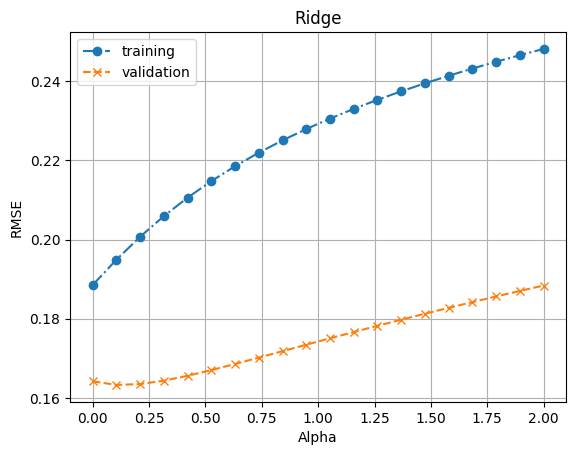

In [10]:
# your code goes here:
alphas = np.linspace(0, 2, 20)
alphas_train_results = dict()
alphas_val_results = dict()
X_test_2 = np.column_stack((np.ones(len(X_test)), X_test))

for alpha in alphas:
    # With every alpha we get the rmse and save in the dict the results
    w_ridge = ridge_regression(X_train, y_train, alpha)

    y_pred_val_ridge = X_val_2 @ w_ridge
    y_pred_test_ridge = X_test_2 @ w_ridge

    alphas_val_results[alpha] = my_rmse(y_val, y_pred_val_ridge)
    alphas_train_results[alpha] = my_rmse(y_test, y_pred_test_ridge)

plt.title("Ridge")
plt.plot(alphas_train_results.keys(), alphas_train_results.values(), label="training", linestyle="-.", marker="o")
plt.plot(alphas_val_results.keys(), alphas_val_results.values(), label="validation", linestyle="--", marker='x')
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()


In [11]:
## leave this cell untouched to see how the plot should look like

Now, after selecting the best $\lambda$ based on the plot above, report the RMSE of the testing set.

Don't forget to use the whole training set (train+validation) to train a model with the best value of $\lambda$.

In [12]:
# your code goes here:

w_best_alpha = ridge_regression(X_train, y_train, 0.2)

y_pred_test = X_test_2 @ w_best_alpha

rmse = my_rmse(y_test, y_pred_test)
print("RMSE: ", rmse, "\nFor alpha: 0.2")

RMSE:  0.20016949301468007 
For alpha: 0.2


# Part II - Lasso

Now you will implement Lasso regression, but using the scikit-learn implementation to learn the weights.

You will still use the same training/validation/testing folds as in Part I

The l1 term is controlled by the alpha parameter in the scikit-learn implementation of Lasso.

In [13]:
# The general way of using the Lasso implementation (or any other classifier/regressor) of scikit-learn is as follows:
# Make sure to replace X, y, and X_val with your training set variables!
alpha_value = 0.2
lasso_regression = Lasso(alpha=alpha_value).fit(X_test, y_test)
y_predict_lasso_reg = lasso_regression.predict(X_val)

### The goal here is to again find a good value of alpha for the RMSE in the validation set. 
Experiment with some different values, generate the same plot as Part I, and report the RMSE of testing set after selecting the best alpha from the validation set.

c:\Users\silla\Desktop\Trabalhos\TACD_2024.1\.venv\Lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\silla\Desktop\Trabalhos\TACD_2024.1\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\silla\Desktop\Trabalhos\TACD_2024.1\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.972e+00, tolerance: 5.988e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented i

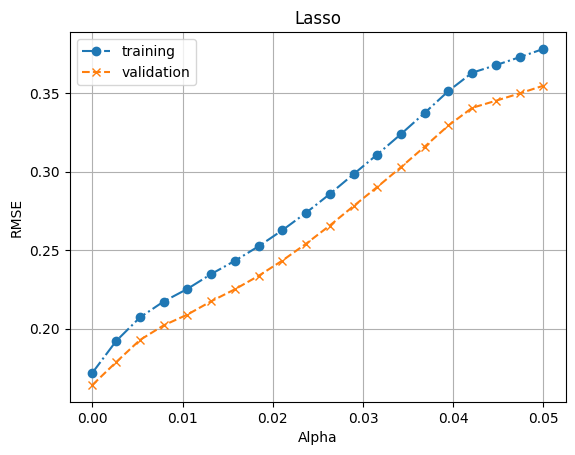

In [14]:
# your code goes here:

alphas = np.linspace(0, 0.05, 20)
alphas_train_results = dict()
alphas_val_results = dict()

for alpha_value in alphas:
    lasso_regression = Lasso(alpha=alpha_value).fit(X_train, y_train)
    y_predict_lasso_reg = lasso_regression.predict(X_val)
    alphas_val_results[alpha_value] = my_rmse(y_val, y_predict_lasso_reg)
    y_predict_lasso_reg_2 = lasso_regression.predict(X_train)
    alphas_train_results[alpha_value] = my_rmse(y_train, y_predict_lasso_reg_2)

best_alpha_pt_2 = min(alphas_val_results, key=alphas_val_results.get)

lasso_regression = Lasso(alpha=best_alpha_pt_2).fit(X_train, y_train)

y_predict_lasso_reg = lasso_regression.predict(X_test)
rmse = my_rmse(y_test, y_predict_lasso_reg)

plt.title("Lasso")
plt.plot(alphas_train_results.keys(), alphas_train_results.values(), label="training", linestyle="-.", marker="o")
plt.plot(alphas_val_results.keys(), alphas_val_results.values(), label="validation", linestyle="--", marker='x')
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.grid(True)
plt.legend()

plt.show()

# Part III Elastic Net

Now let's combine both ridge and lasso and implement Elastic Net Regression, again we'll use the sklearn implementation.

Following the guidelines from Part II, implement Elastic Net using the sklearn implementation ElasticNet()

I strongly advise you to read the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

For simplicity here, let's apply the best $\lambda$ of Part I and the best alpha from Part II and train an Elastic Net model and report the testing set RMSE.

In [15]:
# your code goes here:

elastic_net_pt_1 = ElasticNet(alpha=best_rmse_alpha_pt_1).fit(X_train, y_train)
elastic_net_pt_2 = ElasticNet(alpha=best_alpha_pt_2).fit(X_train, y_train)

y_pred_elastic_1 = elastic_net_pt_1.predict(X_test)
y_pred_elastic_2 = elastic_net_pt_2.predict(X_test)

rmse_1 = my_rmse(y_test, y_pred_elastic_1)
rmse_2 = my_rmse(y_test, y_pred_elastic_2)

print("RMSE Alpha 1:", rmse_1, "\nRMSE Alpha 2:", rmse_2)

RMSE Alpha 1: 0.4229167517545564 
RMSE Alpha 2: 0.1885179771126021


c:\Users\silla\Desktop\Trabalhos\TACD_2024.1\.venv\Lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\silla\Desktop\Trabalhos\TACD_2024.1\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\silla\Desktop\Trabalhos\TACD_2024.1\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.972e+00, tolerance: 5.988e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented i